Normal • Binomial • Poisson (with Visualizations)

In [1]:
# ----------------------------------
# DAY 9: PROBABILITY DISTRIBUTIONS
# ----------------------------------

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, binom, poisson

print("📈 Day 9: Probability Distributions 📈\n")

# Load Titanic dataset
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

# Basic cleaning
df['Age'].fillna(df['Age'].mean(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1


📈 Day 9: Probability Distributions 📈



/tmp/ipython-input-3334488627.py:18: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)
/tmp/ipython-input-3334488627.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

Normal Distribution (Continuous Data)

Age is a good example of (approximately) normal data.

Mean Age: 29.69911764705882
Standard Deviation of Age: 13.002015226002884


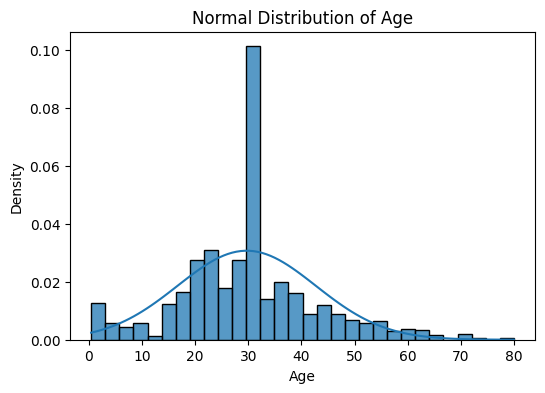

In [2]:
# Calculate mean and standard deviation of Age
mean_age = df['Age'].mean()
std_age = df['Age'].std()

print("Mean Age:", mean_age)
print("Standard Deviation of Age:", std_age)

# Generate x values
x = np.linspace(df['Age'].min(), df['Age'].max(), 100)

# Normal distribution curve
y = norm.pdf(x, mean_age, std_age)

# Plot histogram + normal curve
plt.figure(figsize=(6,4))
sns.histplot(df['Age'], bins=30, stat="density")
plt.plot(x, y)
plt.title("Normal Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Density")
plt.show()


Meaning:

Bell-shaped curve

Most values are around the mean

Used in many ML assumptions

Probability using Normal Distribution

What is the probability a passenger is younger than 20?

In [3]:
prob_less_20 = norm.cdf(20, mean_age, std_age)
print("P(Age < 20):", prob_less_20)


P(Age < 20): 0.22784266778523765


In [4]:
prob_20_40 = norm.cdf(40, mean_age, std_age) - norm.cdf(20, mean_age, std_age)
print("P(20 < Age < 40):", prob_20_40)


P(20 < Age < 40): 0.558050674788013


Binomial Distribution (Yes/No Outcomes)

Survival is binary:
1 = Survived, 0 = Not Survived

In [5]:
p = df['Survived'].mean()
print("Probability of survival:", p)


Probability of survival: 0.3838383838383838


If we randomly pick 10 passengers,
what is the probability exactly 5 survived?

In [6]:
n = 10
k = 5

binom_prob = binom.pmf(k, n, p)
print("P(Exactly 5 survived out of 10):", binom_prob)


P(Exactly 5 survived out of 10): 0.186472912014737


Plot Binomial Distribution:

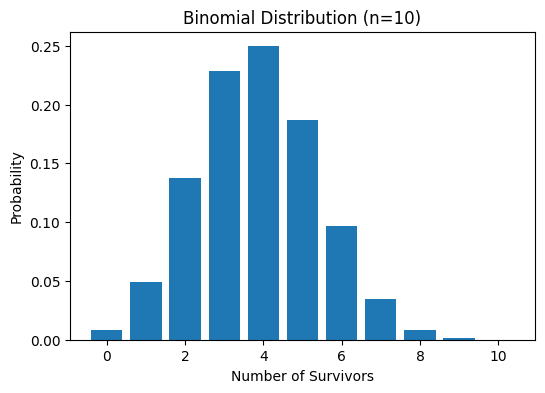

In [7]:
x = np.arange(0, n+1)
y = binom.pmf(x, n, p)

plt.figure(figsize=(6,4))
plt.bar(x, y)
plt.title("Binomial Distribution (n=10)")
plt.xlabel("Number of Survivors")
plt.ylabel("Probability")
plt.show()


Poisson Distribution (Rare Events)

Example:
Assume on average 2 accidents per day happen in a port.
What is the probability of exactly 3 accidents?

In [8]:
lambda_rate = 2  # average events per time
k = 3

poisson_prob = poisson.pmf(k, lambda_rate)
print("P(Exactly 3 events):", poisson_prob)


P(Exactly 3 events): 0.18044704431548356


Plot Poisson Distribution:

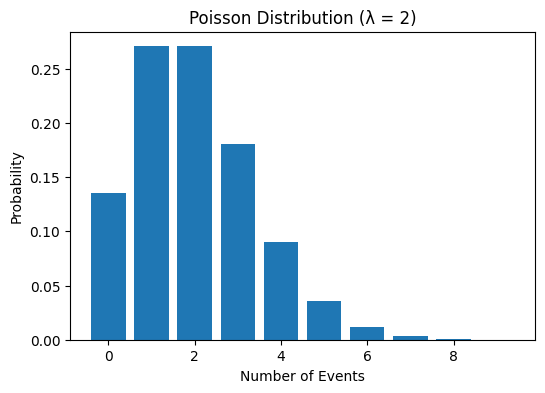

In [9]:
x = np.arange(0, 10)
y = poisson.pmf(x, lambda_rate)

plt.figure(figsize=(6,4))
plt.bar(x, y)
plt.title("Poisson Distribution (λ = 2)")
plt.xlabel("Number of Events")
plt.ylabel("Probability")
plt.show()


Compare Distributions Together (Conceptual)

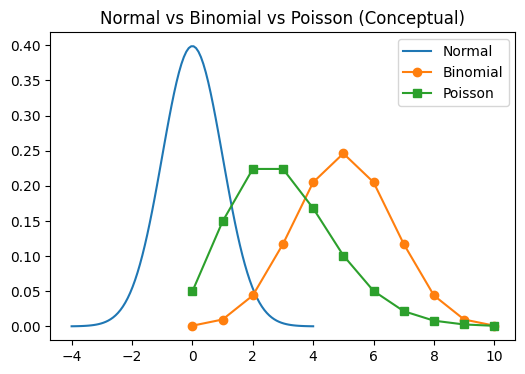

In [10]:
plt.figure(figsize=(6,4))

# Normal example
x_norm = np.linspace(-4, 4, 100)
y_norm = norm.pdf(x_norm)

plt.plot(x_norm, y_norm, label="Normal")

# Binomial example
x_bin = np.arange(0, 11)
y_bin = binom.pmf(x_bin, 10, 0.5)

plt.plot(x_bin, y_bin, marker='o', label="Binomial")

# Poisson example
x_poi = np.arange(0, 11)
y_poi = poisson.pmf(x_poi, 3)

plt.plot(x_poi, y_poi, marker='s', label="Poisson")

plt.title("Normal vs Binomial vs Poisson (Conceptual)")
plt.legend()
plt.show()


Mini Exercises

In [11]:
# 1. Probability passenger is older than 50 using normal distribution
prob_above_50 = 1 - norm.cdf(50, mean_age, std_age)
print("P(Age > 50):", prob_above_50)

# 2. If probability of survival = p, find probability exactly 7 survive out of 15
p = df['Survived'].mean()
prob_7_of_15 = binom.pmf(7, 15, p)
print("P(Exactly 7 survived out of 15):", prob_7_of_15)

# 3. If average emails per hour = 4, probability of receiving exactly 6 emails
prob_6_emails = poisson.pmf(6, 4)
print("P(Exactly 6 emails in an hour):", prob_6_emails)


P(Age > 50): 0.05921891051349848
P(Exactly 7 survived out of 15): 0.16411356840941013
P(Exactly 6 emails in an hour): 0.10419563456702102
